### Clustering press readers data

In [1]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [3]:
press_data = pandas.read_csv('sample_data/press_readers_chicago.csv', sep=';')

In [4]:
def generate_heatmap(data, x_label, y_label):
  sns.set(style='dark')
  res = sns.kdeplot(data=data, x=x_label, y=y_label, fill=True, thresh=0, levels=100, cmap="mako")

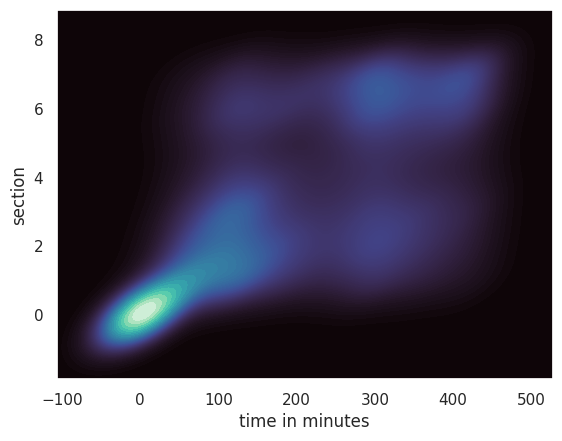

In [5]:
generate_heatmap(press_data, 'time in minutes', 'section')
plt.show()

Clustering without normalization

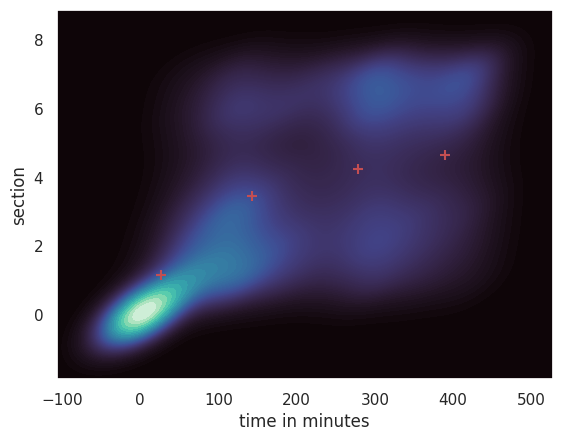

In [6]:
model = KMeans(n_clusters=4, n_init=10)
model.fit(press_data)

generate_heatmap(press_data, 'time in minutes', 'section')

for center in model.cluster_centers_:
  plt.scatter(center[0], center[1], s=50, c='r', marker='+')

plt.show()

Normalizing data

In [7]:
def normalize(data):
  for column in data.columns:
    data[column] = data[column] / data[column].abs().max()
  return data

In [8]:
normalize(press_data)

,time in minutes,section
0,0.428571,0.285714
1,0.000000,0.000000
2,0.714286,0.285714
3,0.857143,0.857143
4,0.714286,1.000000
...,...,...
2934,0.142857,0.714286
2935,0.571429,0.285714
2936,1.000000,1.000000
2937,0.285714,0.571429


Finding optimal number of clusters

In [9]:
def scores_of_model(data, begin_value=2, end_value=10):
  result_array = np.zeros((end_value - begin_value, 2))

  for number_of_clusters in range(begin_value, end_value):
    model = KMeans(n_clusters=number_of_clusters, n_init=10)
    model.fit(data)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(data, labels)
    davies_bouldin = metrics.davies_bouldin_score(data, labels)

    print(f"Scores for {number_of_clusters} clusters: silhouette = {silhouette}, davies_bouldin = {davies_bouldin}")

In [10]:
scores_of_model(press_data)

Scores for 2 clusters: silhouette = 0.46710381364179665, davies_bouldin = 0.8157058038115541
Scores for 3 clusters: silhouette = 0.45892932506959494, davies_bouldin = 0.8385787346997148
Scores for 4 clusters: silhouette = 0.4896016773037831, davies_bouldin = 0.7404665226779148
Scores for 5 clusters: silhouette = 0.49285933866055853, davies_bouldin = 0.7027138962157112
Scores for 6 clusters: silhouette = 0.48129363211122045, davies_bouldin = 0.7528887070019049
Scores for 7 clusters: silhouette = 0.48501651168936927, davies_bouldin = 0.7886837623734942
Scores for 8 clusters: silhouette = 0.49126243175604484, davies_bouldin = 0.7877530467021453
Scores for 9 clusters: silhouette = 0.4975256047627594, davies_bouldin = 0.8051223434524023


The best scores are for 6 clusters

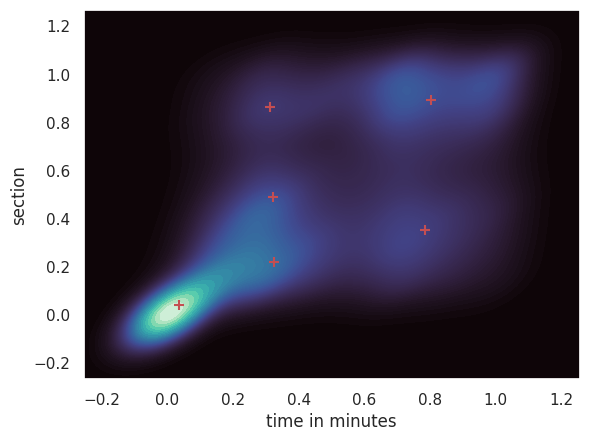

In [11]:
model = KMeans(n_clusters=6, n_init=10)
model.fit(press_data)

generate_heatmap(press_data, 'time in minutes', 'section')

for center in model.cluster_centers_:
  plt.scatter(center[0], center[1], s=50, c='r', marker='+')

plt.show()

Sample test

In [12]:
sample_test=np.array([250,3])
for index, column in enumerate(press_data.columns):
    sample_test[index] = sample_test[index] / press_data[column].abs().max()

model.predict(sample_test.reshape(1, -1))

array([1], dtype=int32)